# **Introduction**

In this article, I will introduce you to a machine learning project on Covid-19 cases prediction with Python for the next 30 days. These types of predictive models help in providing an accurate prediction of epidemics, which is essential for obtaining information on the likely spread and consequences of infectious diseases.

Governments and other legislative bodies rely on these kinds of machine learning predictive models and ideas to suggest new policies and assess the effectiveness of applied policies.

I will start the task of Covid-19 cases prediction with Python for the next 30 days by importing the necessary Python libraries and the dataset:

# **Importing the necessary Python libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fbprophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

# **Load Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df0 = pd.read_csv("/content/drive/MyDrive/Datasets/Covid-19/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/Covid-19/CONVENIENT_global_deaths.csv")

# **Data Preparation**


Now the next step is data preparation, I will simply prepare new data by combining the above datasets and then we will visualize a geographical plot of the data to see what we are going to work with:

In [19]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent=pd.read_csv("/content/drive/MyDrive/Datasets/Covid-19/continents2.csv")
continent["name"]=continent["name"].str.upper()

# **Data Visualization**


Then the next visualization will be to have a look at the daily cases of Covid-19 in the world. Then the last visualization will be to have a look at the daily death cases of Covid-19 in the world.

Now let’s have a look at the daily cases all around the world:



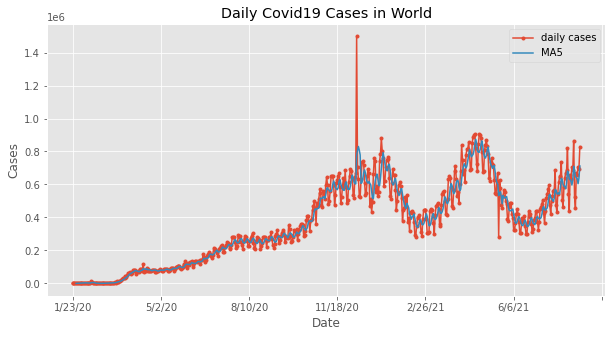

In [20]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

Now let’s have a look at the daily death cases of Covid-19:



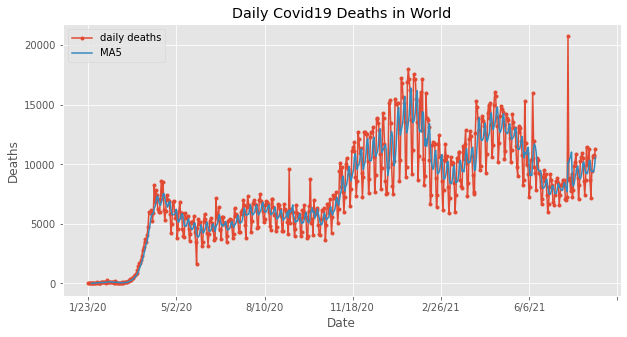

In [21]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# **Covid-19 Cases Prediction with Python for Next 30 Days**

Now, I will use the Facebook prophet model for the task of Covid-19 cases prediction with Python for the next 30 days. Facebook prophet model uses time series method for forecasting. 

Let’s see how we can use the Facebook prophet model for Covid-19 cases prediction with Python for the next 30 days:

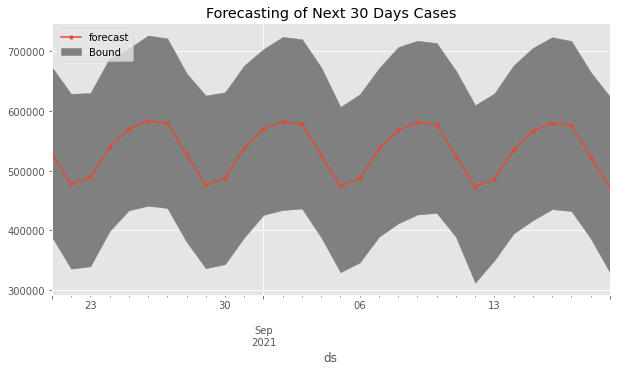

In [16]:
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
        
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()

# **References**

[Covid-19 Cases Prediction with Python
](https://thecleverprogrammer.com/2020/11/29/covid-19-cases-prediction-with-python/)